In [76]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('../core/output/batters.csv')
df_adv = pd.read_csv('../core/output/advanced_batting.csv')

<h3>Adding Advanced Stats</h3>
<p>We will use a combination of wOBA, wRC+ and WAR as our overall rating - our Y value.</p>

In [43]:
df_adv.sort_values('retroID')

,retroID,wOBA,wRC+,WAR
9203,aardd001,0.000,-100.0,-0.1
3,aaroh101,0.403,153.0,136.3
13920,aarot101,0.282,76.0,-1.7
9158,aased001,0.000,-100.0,-0.1
11841,abada001,0.184,0.0,-0.4
...,...,...,...,...
13227,zupcb001,0.293,74.0,-0.9
10487,zupof101,0.225,37.0,-0.2
11591,zuveg101,0.179,0.0,-0.3
14134,zuvep001,0.254,52.0,-2.2


In [42]:
df

,retroID,weight,height,debutYear,finalYear,pos_1B,pos_2B,pos_3B,pos_C,pos_OF,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,NL
0,aardd001,0.569672,0.60,2004,2015,0,0,0,0,0,...,0,0.0,0,2,0,0,1,0,0,1
1,aaroh101,0.426230,0.45,1954,1976,0,0,0,0,1,...,240,73.0,1402,1383,293,32,21,121,328,1
2,aarot101,0.467213,0.60,1962,1971,1,0,0,0,0,...,9,8.0,86,145,3,0,9,6,36,1
3,aased001,0.467213,0.60,1977,1990,0,0,0,0,0,...,0,0.0,0,3,0,0,0,0,0,1
4,abada001,0.442623,0.50,2001,2006,1,0,0,0,0,...,0,1.0,4,5,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15288,zupcb001,0.590164,0.65,1991,1994,0,0,0,0,1,...,7,5.0,57,137,3,6,20,8,15,0
15289,zupof101,0.434426,0.40,1957,1961,0,0,0,1,0,...,0,0.0,2,6,0,0,0,0,0,0
15290,zuveg101,0.487705,0.65,1951,1959,0,0,0,0,0,...,0,1.0,9,39,0,0,16,0,3,1
15291,zuvep001,0.397541,0.45,1982,1991,0,0,0,0,0,...,2,0.0,34,50,1,2,18,0,8,1


In [35]:
df.shape

(15293, 36)

In [36]:
df_adv.shape

(14399, 4)

In [44]:
df = df.merge(df_adv, how='left')

In [46]:
df['wOBA'].fillna(0, inplace=True)
df['wRC+'].fillna(0, inplace=True)
df['WAR'].fillna(0, inplace=True)

In [47]:
df

,retroID,weight,height,debutYear,finalYear,pos_1B,pos_2B,pos_3B,pos_C,pos_OF,...,SO,IBB,HBP,SH,SF,GIDP,NL,wOBA,wRC+,WAR
0,aardd001,0.569672,0.60,2004,2015,0,0,0,0,0,...,2,0,0,1,0,0,1,0.000,-100.0,-0.1
1,aaroh101,0.426230,0.45,1954,1976,0,0,0,0,1,...,1383,293,32,21,121,328,1,0.403,153.0,136.3
2,aarot101,0.467213,0.60,1962,1971,1,0,0,0,0,...,145,3,0,9,6,36,1,0.282,76.0,-1.7
3,aased001,0.467213,0.60,1977,1990,0,0,0,0,0,...,3,0,0,0,0,0,1,0.000,-100.0,-0.1
4,abada001,0.442623,0.50,2001,2006,1,0,0,0,0,...,5,0,0,0,0,1,1,0.184,0.0,-0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15288,zupcb001,0.590164,0.65,1991,1994,0,0,0,0,1,...,137,3,6,20,8,15,0,0.293,74.0,-0.9
15289,zupof101,0.434426,0.40,1957,1961,0,0,0,1,0,...,6,0,0,0,0,0,0,0.225,37.0,-0.2
15290,zuveg101,0.487705,0.65,1951,1959,0,0,0,0,0,...,39,0,0,16,0,3,1,0.179,0.0,-0.3
15291,zuvep001,0.397541,0.45,1982,1991,0,0,0,0,0,...,50,1,2,18,0,8,1,0.254,52.0,-2.2


<p>For now, we're just going to take the mean of the three most accepted advanced statistics, giving them equal importance. This will lead to a model that favors offense over defense, as WAR is the only stat that takes defense into account, but that's fine.</p>

In [50]:
df['Batting'] = df[['wOBA', 'wRC+', 'WAR']].mean(axis=1).round(3)

In [51]:
df['Batting']

0       -33.367
1        96.568
2        24.861
3       -33.367
4        -0.072
          ...  
15288    24.464
15289    12.342
15290    -0.040
15291    16.685
15292     0.000
Name: Rating, Length: 15293, dtype: float64

In [81]:
df['Batting'].mean()

11.660071993722617

In [82]:
df['Batting'].min()

-33.5

In [83]:
df['Batting'].max()

337.916

<h3>Normalization</h3>
<p>The Batting stat now has a very wide range which seems to trend more toward the lower end. We need to normalize the statistic so that our sigmoid output will be able to accurately predict it. For this reason, we'll use min-max normalization to get a range [0, 1].</p>

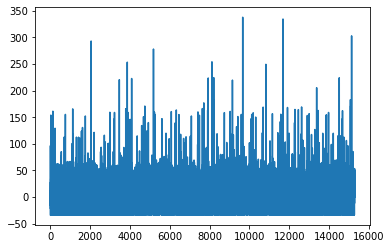

In [77]:
plt.plot(df['Batting'])

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [85]:
scaler = MinMaxScaler()

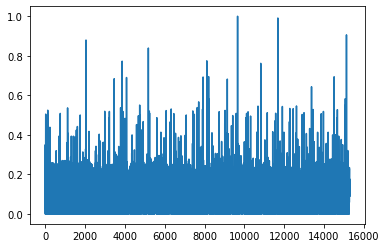

In [86]:
plt.plot(scaler.fit_transform(df[['Batting']]))

In [88]:
df['Batting'] = scaler.fit_transform(df[['Batting']])

In [89]:
df

,retroID,weight,height,debutYear,finalYear,pos_1B,pos_2B,pos_3B,pos_C,pos_OF,...,IBB,HBP,SH,SF,GIDP,NL,wOBA,wRC+,WAR,Rating
0,aardd001,0.569672,0.60,2004,2015,0,0,0,0,0,...,0,0,1,0,0,1,0.000,-100.0,-0.1,0.000358
1,aaroh101,0.426230,0.45,1954,1976,0,0,0,0,1,...,293,32,21,121,328,1,0.403,153.0,136.3,0.350195
2,aarot101,0.467213,0.60,1962,1971,1,0,0,0,0,...,3,0,9,6,36,1,0.282,76.0,-1.7,0.157131
3,aased001,0.467213,0.60,1977,1990,0,0,0,0,0,...,0,0,0,0,0,1,0.000,-100.0,-0.1,0.000358
4,abada001,0.442623,0.50,2001,2006,1,0,0,0,0,...,0,0,0,0,1,1,0.184,0.0,-0.4,0.090002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15288,zupcb001,0.590164,0.65,1991,1994,0,0,0,0,1,...,3,6,20,8,15,0,0.293,74.0,-0.9,0.156062
15289,zupof101,0.434426,0.40,1957,1961,0,0,0,1,0,...,0,0,0,0,0,0,0.225,37.0,-0.2,0.123425
15290,zuveg101,0.487705,0.65,1951,1959,0,0,0,0,0,...,0,0,16,0,3,1,0.179,0.0,-0.3,0.090088
15291,zuvep001,0.397541,0.45,1982,1991,0,0,0,0,0,...,1,2,18,0,8,1,0.254,52.0,-2.2,0.135118


<p>We now have the Y value that our NN should attempt to predict. We'll keep wOBA, wRC+ and WAR as columns at this point so we can decide later if they need to come out.</p>